In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Load data
df = pd.read_csv("vgsales.csv")
print(df.describe())
df.head()

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# I want to see rows with NaN values, then I will drop them
# Select rows with any NaN values
rows_with_nan = df[df.isnull().any(axis=1)]

# Create a new DataFrame with rows containing NaN values
new_df = pd.DataFrame(rows_with_nan)

new_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [4]:
# Drop rows with NaN values from the original DataFrame
df_cleaned = df.dropna()
print(df_cleaned.describe())
df_cleaned

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
# I want to analyze games released after 2010
drop_row_index = df_cleaned[df_cleaned['Year'] < 2010].index
df_cleaned = df_cleaned.drop(drop_row_index)

print(df_cleaned.describe())
df_cleaned.head()

               Rank         Year     NA_Sales     EU_Sales     JP_Sales  \
count   5134.000000  5134.000000  5134.000000  5134.000000  5134.000000   
mean    8903.949357  2012.251071     0.216724     0.163331     0.058192   
std     4914.303885     1.966175     0.615722     0.465067     0.227404   
min       16.000000  2010.000000     0.000000     0.000000     0.000000   
25%     4680.250000  2011.000000     0.000000     0.000000     0.000000   
50%     9246.000000  2012.000000     0.050000     0.030000     0.000000   
75%    13335.500000  2014.000000     0.180000     0.130000     0.040000   
max    16599.000000  2020.000000    14.970000     9.270000     5.650000   

       Other_Sales  Global_Sales  
count  5134.000000   5134.000000  
mean      0.052538      0.490923  
std       0.155971      1.242906  
min       0.000000      0.010000  
25%       0.000000      0.050000  
50%       0.010000      0.140000  
75%       0.040000      0.410000  
max       4.140000     21.820000  


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76


In [6]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5134 entries, 15 to 16596
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          5134 non-null   int64  
 1   Name          5134 non-null   object 
 2   Platform      5134 non-null   object 
 3   Year          5134 non-null   float64
 4   Genre         5134 non-null   object 
 5   Publisher     5134 non-null   object 
 6   NA_Sales      5134 non-null   float64
 7   EU_Sales      5134 non-null   float64
 8   JP_Sales      5134 non-null   float64
 9   Other_Sales   5134 non-null   float64
 10  Global_Sales  5134 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 481.3+ KB


Action          1438
Sports           570
Misc             563
Role-Playing     557
Adventure        542
Shooter          395
Racing           233
Simulation       207
Fighting         197
Strategy         167
Platform         150
Puzzle           115
Name: Genre, dtype: int64


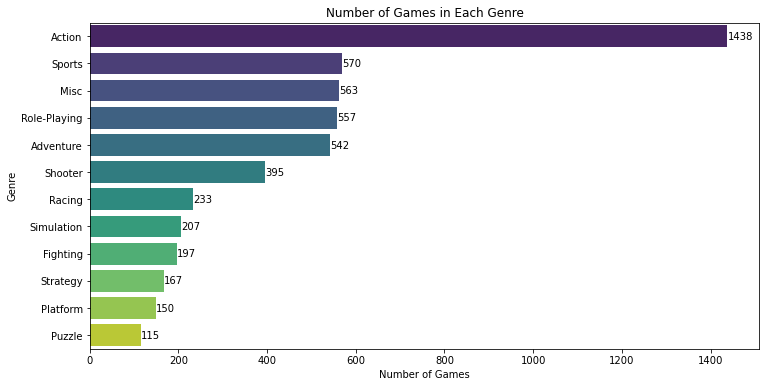

In [7]:
# Count the number of games in each genre
genre_counts = df_cleaned['Genre'].value_counts()
print(genre_counts)

# Creating a horizontal bar plot using Seaborn with values inside bars
plt.figure(figsize=(12, 6))
plot = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')

# Display values inside the bars
for index, value in enumerate(genre_counts.values):
    plot.text(value, index, f'{value}', ha="left", va="center", fontsize=10)

plt.title('Number of Games in Each Genre')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()

2010    1257
2011    1136
2012     655
2015     614
2014     580
2013     546
2016     342
2017       3
2020       1
Name: Year, dtype: int64


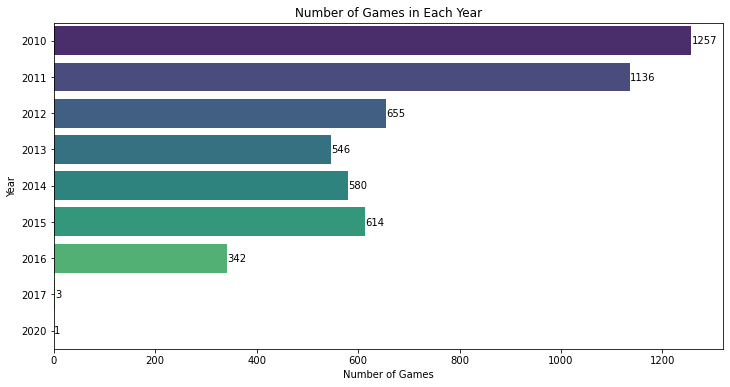

In [8]:
# Count the number of games in each genre
df_cleaned['Year'] = df_cleaned['Year'].astype(str).str.split('.').str[0]
year_counts = df_cleaned['Year'].value_counts()
print(year_counts)
year_counts = year_counts.sort_index()

# Creating a horizontal bar plot using Seaborn with values inside bars
plt.figure(figsize=(12, 6))
plot = sns.barplot(x=year_counts.values, y=year_counts.index, palette='viridis')

# Display values inside the bars
for index, value in enumerate(year_counts.values):
    plot.text(value, index, f'{value}', ha="left", va="center", fontsize=10)

plt.title('Number of Games in Each Year')
plt.xlabel('Number of Games')
plt.ylabel('Year')
plt.show()

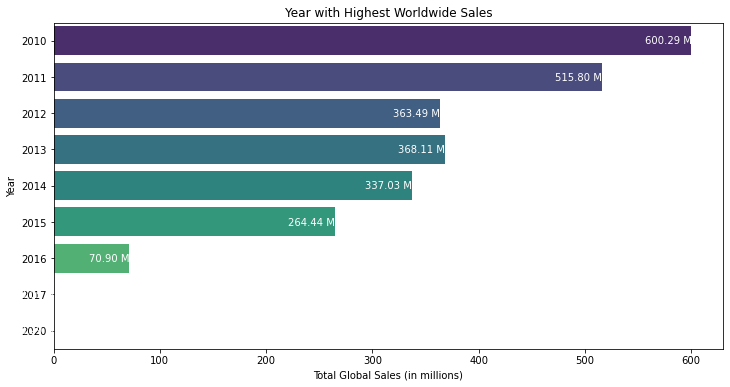

In [9]:
df_cleaned['Year'] = df_cleaned['Year'].astype(str).str.split('.').str[0]

# Grouping by year and calculate the total global sales for each year
total_sales_by_year = df_cleaned.groupby('Year')['Global_Sales'].sum().reset_index()

# Finding the year with the highest total global sales
year_with_highest_sales = total_sales_by_year.loc[total_sales_by_year['Global_Sales'].idxmax()]

# Plotting horizontally
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='Global_Sales', y='Year', data=total_sales_by_year.sort_values('Year'), palette='viridis')

# Add value labels to the bars
for index, value in enumerate(total_sales_by_year['Global_Sales']):
    plot.text(value, index, f'{value:.2f} M', ha="right", va="center", fontsize=10, color='white')

plt.title('Year with Highest Worldwide Sales')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Year')
plt.show()

    Year         Genre  Global_Sales
0   2010        Action        117.64
12  2011        Action        118.96
24  2012        Action        122.01
36  2013        Action        125.22
48  2014        Action         99.02
60  2015        Action         70.70
72  2016        Action         19.90
84  2017  Role-Playing          0.04
85  2020    Simulation          0.29


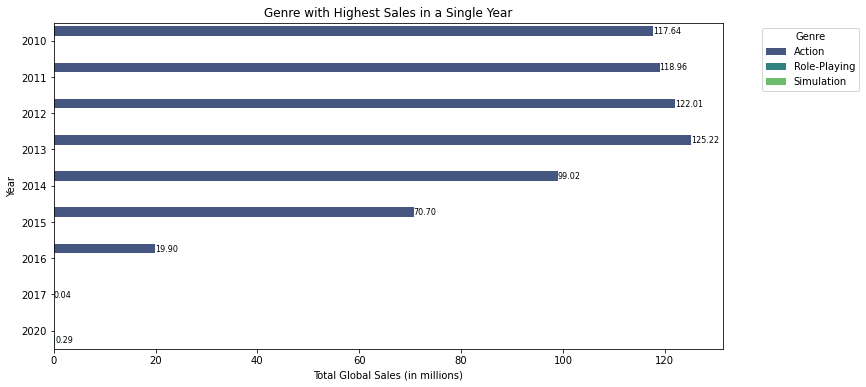

In [10]:
# Linear
total_sales_by_year_genre = df_cleaned.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Finding the genre with the highest total sales in a single year
genre_with_highest_sales = total_sales_by_year_genre.loc[total_sales_by_year_genre.groupby('Year')['Global_Sales'].idxmax()]
 
print(genre_with_highest_sales)
# Plotting horizontally
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='Global_Sales', y='Year', hue='Genre', data=genre_with_highest_sales, palette='viridis')

# Display values inside the bars
for p in plot.patches:
    plot.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                  ha='left', va='center', fontsize=8, color='black')
    
plt.title('Genre with Highest Sales in a Single Year')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Year')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

    Year         Genre  Global_Sales
0   2010        Action        117.64
12  2011        Action        118.96
24  2012        Action        122.01
36  2013        Action        125.22
48  2014        Action         99.02
60  2015        Action         70.70
72  2016        Action         19.90
84  2017  Role-Playing          0.04
85  2020    Simulation          0.29


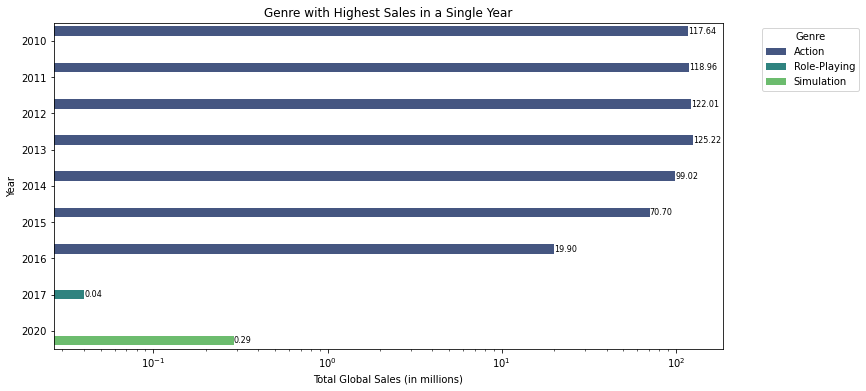

In [11]:
# Logarithmic
total_sales_by_year_genre = df_cleaned.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Finding the genre with the highest total sales in a single year
genre_with_highest_sales = total_sales_by_year_genre.loc[total_sales_by_year_genre.groupby('Year')['Global_Sales'].idxmax()]
print(genre_with_highest_sales)
# Plotting horizontally with log scale for the y-axis
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='Global_Sales', y='Year', hue='Genre', data=genre_with_highest_sales, palette='viridis')

# Setting a log scale for the x-axis
plt.xscale('log')

# Display values inside the bars
for p in plot.patches:
    plot.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                  ha='left', va='center', fontsize=8, color='black')

plt.title('Genre with Highest Sales in a Single Year')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Year')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

           Genre  Global_Sales
0         Action        673.46
1      Adventure         61.03
2       Fighting         82.08
3           Misc        238.05
4       Platform        120.67
5         Puzzle         21.23
6         Racing        123.68
7   Role-Playing        305.71
8        Shooter        462.80
9     Simulation         71.15
10        Sports        324.80
11      Strategy         35.74


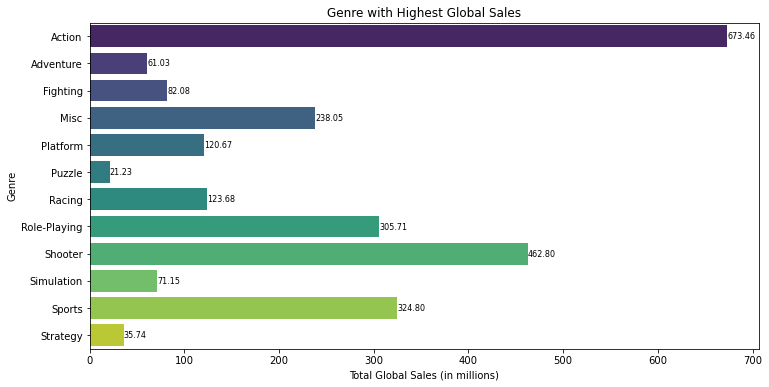

In [12]:

total_sales_by_genre = df_cleaned.groupby('Genre')['Global_Sales'].sum().reset_index()

# Find the genre with the highest total global sales
genre_with_highest_sales = total_sales_by_genre.loc[total_sales_by_genre['Global_Sales'].idxmax()]
print(total_sales_by_genre)
# Plotting horizontally with viridis color palette
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='Global_Sales', y='Genre', data=total_sales_by_genre, palette='viridis')

# Display values inside the bars
for p in plot.patches:
    plot.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                  ha='left', va='center', fontsize=8, color='black')

plt.title('Genre with Highest Global Sales')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Genre')
plt.show()

   Platform  Global_Sales
0       3DS        246.27
1        DS        129.64
2        PC        119.78
3       PS2          6.10
4       PS3        602.44
5       PS4        278.10
6       PSP         64.27
7       PSV         61.60
8       Wii        232.33
9      WiiU         81.86
10     X360        556.95
11     XOne        141.06


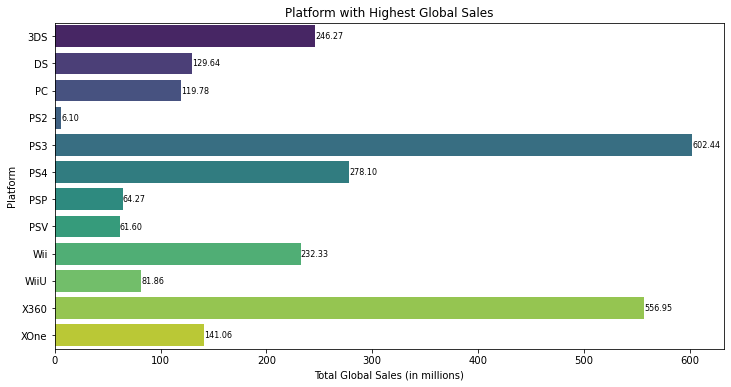

In [13]:
total_sales_by_platform = df_cleaned.groupby('Platform')['Global_Sales'].sum().reset_index()
print(total_sales_by_platform)
# Find the platform with the highest total global sales
platform_with_highest_sales = total_sales_by_platform.loc[total_sales_by_platform['Global_Sales'].idxmax()]

# Plotting horizontally with viridis color palette
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='Global_Sales', y='Platform', data=total_sales_by_platform, palette='viridis')

# Display values inside the bars
for p in plot.patches:
    plot.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                  ha='left', va='center', fontsize=8, color='black')

plt.title('Platform with Highest Global Sales')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Platform')
plt.show()

    Rank                            Name Platform  Year         Genre  \
15    16              Kinect Adventures!     X360  2010          Misc   
16    17              Grand Theft Auto V      PS3  2013        Action   
23    24              Grand Theft Auto V     X360  2013        Action   
26    27     Pokemon Black/Pokemon White       DS  2010  Role-Playing   
29    30  Call of Duty: Modern Warfare 3     X360  2011       Shooter   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
15  Microsoft Game Studios     14.97      4.94      0.24         1.67   
16    Take-Two Interactive      7.01      9.27      0.97         4.14   
23    Take-Two Interactive      9.63      5.31      0.06         1.38   
26                Nintendo      5.57      3.28      5.65         0.82   
29              Activision      9.03      4.28      0.13         1.32   

    Global_Sales  
15         21.82  
16         21.40  
23         16.38  
26         15.32  
29         14.76  


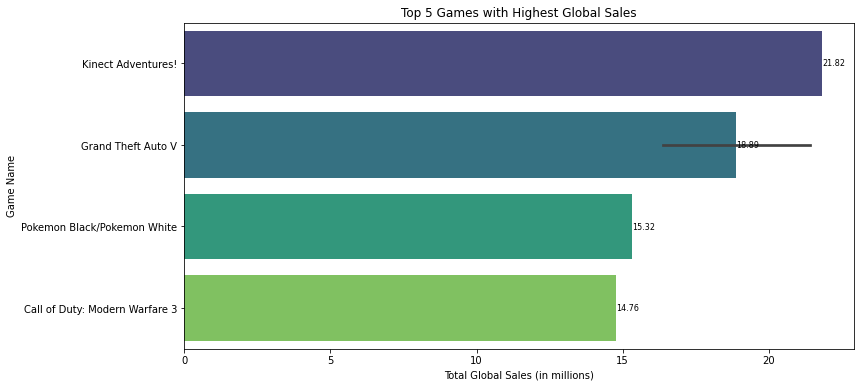

In [14]:
top_5_games = df_cleaned.nlargest(5, 'Global_Sales')
print(top_5_games)
# Plotting a horizontal bar for the top 5 games
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='Global_Sales', y='Name', data=top_5_games, palette='viridis')

# Display the values inside the bars
for p in plot.patches:
    plot.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                  ha='left', va='center', fontsize=8, color='black')

plt.title('Top 5 Games with Highest Global Sales')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Game Name')
plt.show()

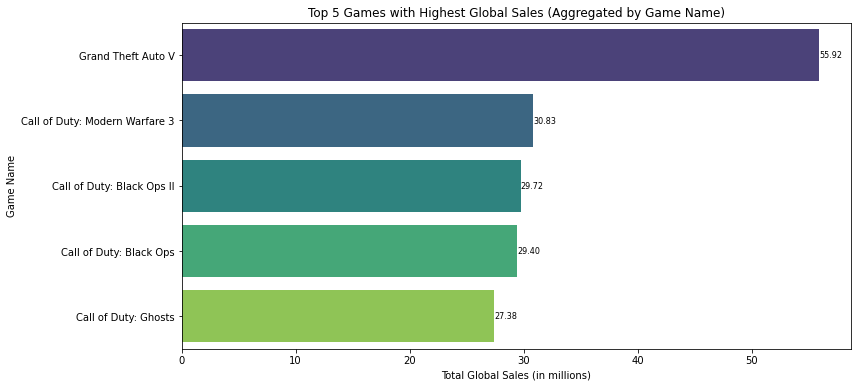

In [15]:
# GTA V is problematic because it is in the list with 2 platforms. so I aggregated them:
grouped_by_game = df_cleaned.groupby('Name')['Global_Sales'].sum().reset_index()

# Find the top 5 games with the highest global sales
top_5_games = grouped_by_game.nlargest(5, 'Global_Sales')

# Plotting a horizontal bar for the top 5 games
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='Global_Sales', y='Name', data=top_5_games, palette='viridis')

# Display the values inside the bars
for p in plot.patches:
    plot.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                  ha='left', va='center', fontsize=8, color='black')

plt.title('Top 5 Games with Highest Global Sales (Aggregated by Game Name)')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Game Name')
plt.show()

   Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0       3DS     78.03     58.29     97.30        12.55
1        DS     62.84     30.34     27.90         8.57
2        PC     37.97     65.88      0.00        15.67
3       PS2      2.32      1.67      0.80         1.30
4       PS3    228.11    224.27     59.06        90.87
5       PS4     96.80    123.70     14.30        43.36
6       PSP      9.58      7.86     42.20         4.72
7       PSV     16.07     16.27     20.86         8.41
8       Wii    126.51     69.14     17.75        18.85
9      WiiU     38.32     24.23     12.79         6.45
10     X360    332.92    171.24      5.46        47.06
11     XOne     83.19     45.65      0.34        11.92


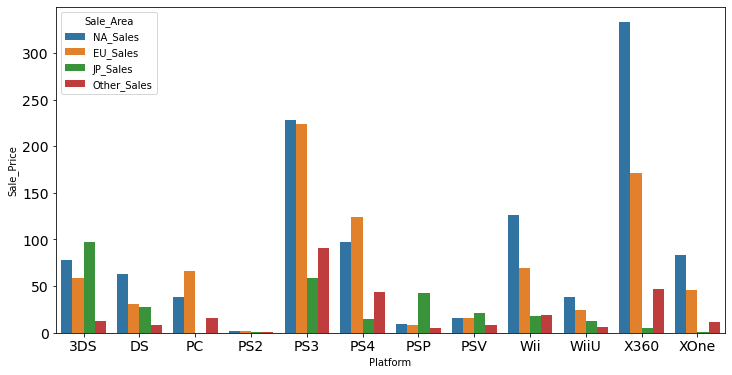

In [16]:
comp_platform = df_cleaned[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

print(comp_platform)
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')

plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

                Publisher  Global_Sales
0              1C Company          0.09
1               505 Games         25.10
2                     5pb          1.35
3                7G//AMES          0.08
4       ASCII Media Works          0.14
..                    ...           ...
259       dramatic create          0.11
260                  iWin          0.06
261       imageepoch Inc.          0.04
262  inXile Entertainment          0.10
263             mixi, Inc          0.86

[264 rows x 2 columns]


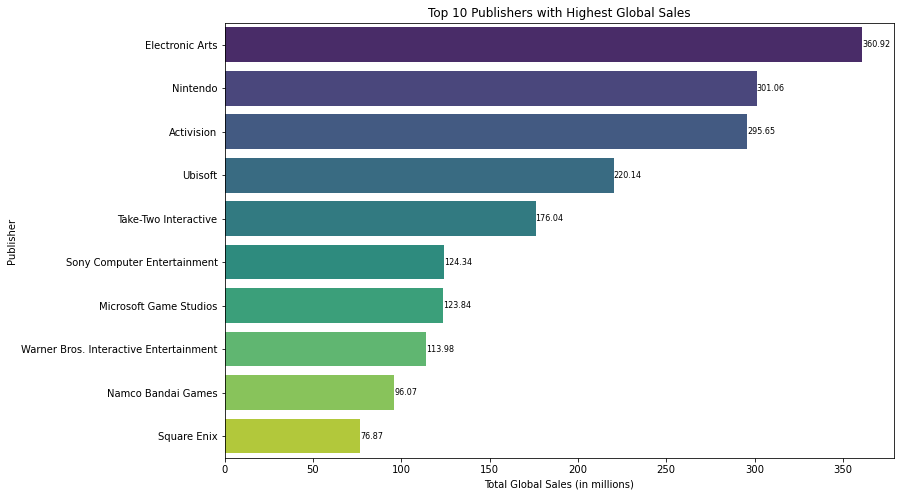

In [17]:
grouped_by_publisher = df_cleaned.groupby('Publisher')['Global_Sales'].sum().reset_index()

print(grouped_by_publisher)
# Find the top 10 publishers with the highest global sales
top_10_publishers = grouped_by_publisher.nlargest(10, 'Global_Sales')

# Plotting a horizontal bar for the top 10 publishers
plt.figure(figsize=(12, 8))
plot = sns.barplot(x='Global_Sales', y='Publisher', data=top_10_publishers, palette='viridis')

# Display the values inside the bars
for p in plot.patches:
    plot.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                  ha='left', va='center', fontsize=8, color='black')

plt.title('Top 10 Publishers with Highest Global Sales')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Publisher')
plt.show()

NA_Sales       1112.66
EU_Sales        838.54
JP_Sales        298.76
Other_Sales     269.73
dtype: float64


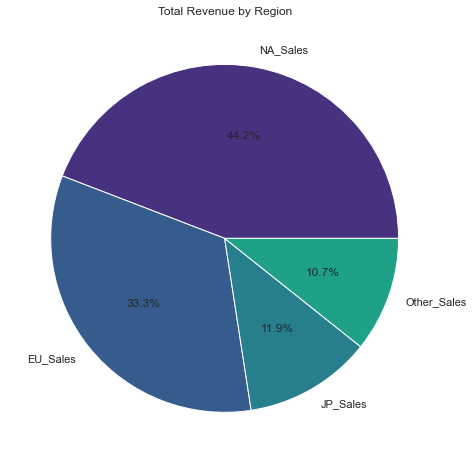

In [18]:
df_cleaned['Total_Sales'] = df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

# Calculate the total sales in each region
total_sales_by_region = df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

print(total_sales_by_region)
# Plotting a pie chart for total revenue by region using Seaborn
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.pie(total_sales_by_region, labels=total_sales_by_region.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Total Revenue by Region')
plt.show()

<AxesSubplot:>

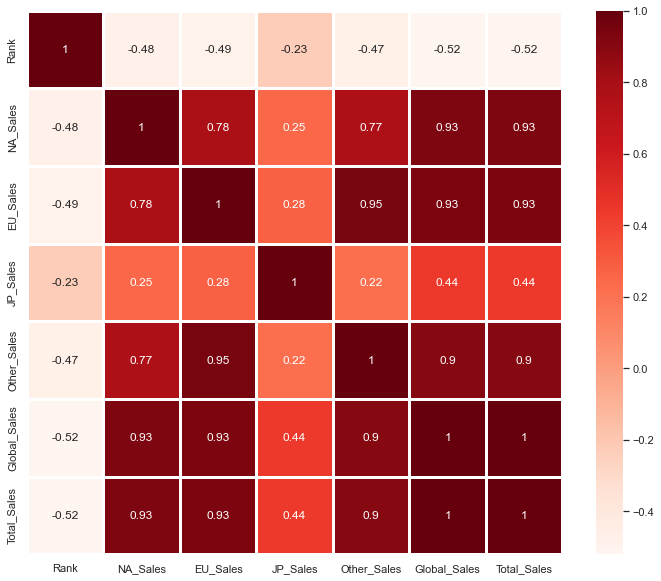

In [19]:
plt.figure(figsize=(12,10))

sns.heatmap(df_cleaned.corr(), cmap = "Reds", annot=True, linewidth=3)

C:\Users\yahya.demirbas\AppData\Local\Temp\ipykernel_3492\3423598055.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_games_by_genre = df_cleaned.groupby('Genre')['Global_Sales', 'Name'].max().reset_index()


           Genre  Global_Sales                                      Name
3           Misc         21.82              uDraw Studio: Instant Artist
0         Action         21.40                      inFAMOUS: Second Son
7   Role-Playing         15.32  Zillions of Enemy X: Zetsukai no Crusade
8        Shooter         14.76                       Zombie Army Trilogy
6         Racing         12.21                                    nail'd
4       Platform         10.79               htoL#NiQ: The Firefly Diary
9     Simulation          9.09                         Zoo Tycoon (2013)
10        Sports          8.49                 pro evolution soccer 2011
2       Fighting          7.45   Ys vs. Sora no Kiseki: Alternative Saga
11      Strategy          4.83         Yuusha no Kuse ni Namaikida Or 3D


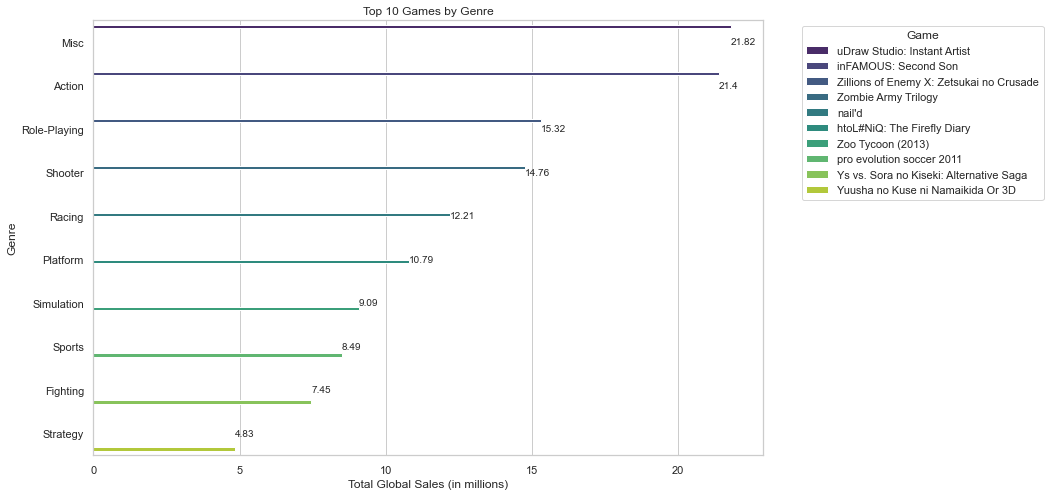

In [20]:
top_games_by_genre = df_cleaned.groupby('Genre')['Global_Sales', 'Name'].max().reset_index()

# Sorting values to get the top 10 games by genre
top_games_by_genre = top_games_by_genre.sort_values(by='Global_Sales', ascending=False).head(10)

print(top_games_by_genre)
# Creating a horizontal bar plot using Seaborn
plt.figure(figsize=(12, 8))
plot = sns.barplot(x='Global_Sales', y='Genre', hue='Name', data=top_games_by_genre, palette='viridis')

# Display values inside the bars
for index, value in enumerate(top_games_by_genre['Global_Sales']):
    plot.text(value, index, f'{value}', ha="left", va="center", fontsize=10)

plt.title('Top 10 Games by Genre')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Genre')
plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()